# Importing Libraries

In [1]:
import random, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pipeline Analysis

In [2]:
df = pd.read_csv(r"C:\Users\jaske\PycharmProjects\capstone\logs\source_custom_logs.csv")
df["creation_time"] = pd.to_datetime(df["creation_time"])
df["receiver_time"] = pd.to_datetime(df["receiver_time"])

In [3]:
df.sort_values(by=["block"], ascending=True, inplace=True)
df["block_time_difference"] = (df["creation_time"].diff().dt.total_seconds() / 60)
df["block_time_difference"].fillna(df["block_time_difference"].mean(), inplace=True)
df["block_time_difference"] = [math.ceil(value) for value in df["block_time_difference"]]

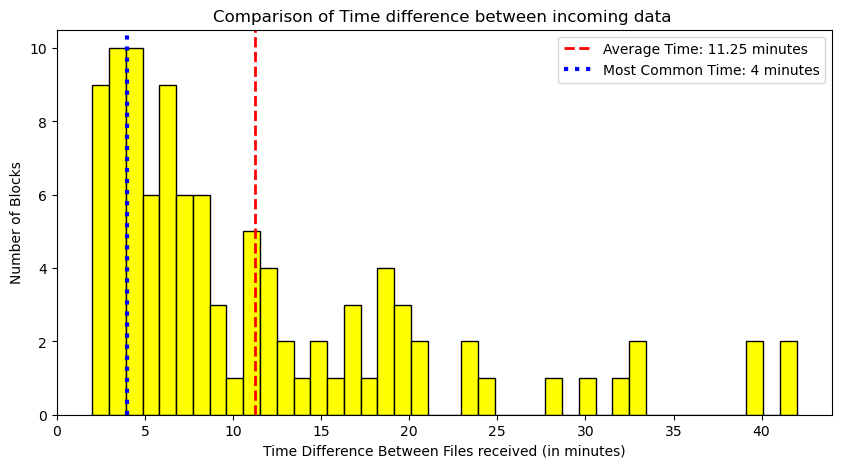

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(df["block_time_difference"], bins=len(range(0, df["block_time_difference"].max())), color="yellow", edgecolor="black")

average_value = df["block_time_difference"].mean()
plt.axvline(x=average_value, color="red", linestyle="dashed", linewidth=2, label=f"Average Time: {average_value:.2f} minutes")

mode_value = df["block_time_difference"].mode().iloc[-1]
plt.axvline(x=mode_value, color="blue", linestyle="dotted", linewidth=3, label=f"Most Common Time: {mode_value:.0f} minutes")

plt.xlabel("Time Difference Between Files received (in minutes)")
plt.ylabel("Number of Blocks")
plt.title("Comparison of Time difference between incoming data ")
plt.legend()
plt.show()

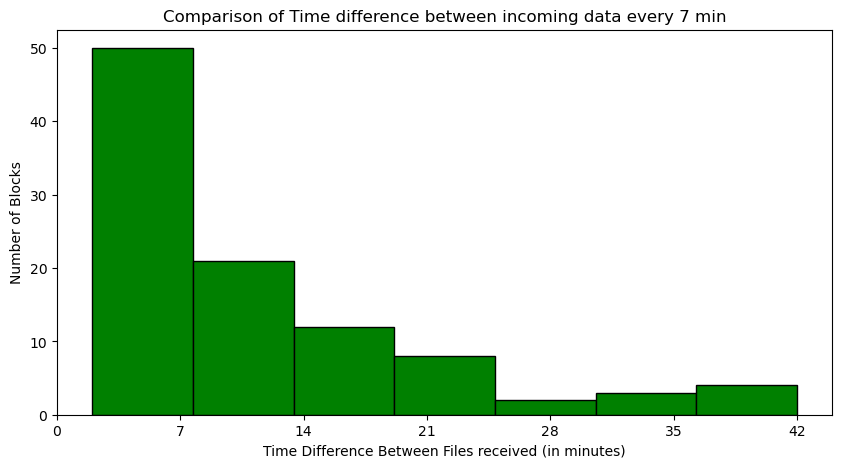

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(df["block_time_difference"], bins=7, color="green", edgecolor="black")
plt.xticks([0, 7, 14, 21, 28, 35, 42])
plt.xlabel("Time Difference Between Files received (in minutes)")
plt.ylabel("Number of Blocks")
plt.title("Comparison of Time difference between incoming data every 7 min")
plt.show()

In [6]:
import os
import json

number_of_transactions = []
def read_blocks(folder_path):
    files = os.listdir(folder_path)
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r") as file:
            data = json.load(file)
            number_of_transactions.append({"file": file_path, "transactions": len(data["transactions"])})

folder_path = r"C:\Users\jaske\PycharmProjects\capstone\data"
read_blocks(folder_path)
print("Maximum", max(number_of_transactions, key=lambda x: x["transactions"]))
print("Minimum", min(number_of_transactions, key=lambda x: x["transactions"]))

Maximum {'file': 'C:\\Users\\jaske\\PycharmProjects\\capstone\\data\\832723.json', 'transactions': 3465}
Minimum {'file': 'C:\\Users\\jaske\\PycharmProjects\\capstone\\data\\832797.json', 'transactions': 270}


# Source Analysis

In [7]:
df = pd.read_csv(r"C:\Users\jaske\PycharmProjects\capstone\logs\source_logs.csv")
df["creation_time"] = pd.to_datetime(df["creation_time"])
df["receiver_time"] = pd.to_datetime(df["receiver_time"])
df = df.groupby("block").first().reset_index()
df["time_difference"] = ((df["receiver_time"] - df["creation_time"]).dt.total_seconds() / 60)
df.head()

,block,creation_time,receiver_time,time_difference
0,832697,2024-03-02 00:44:24.164011,2024-03-02 01:25:01.349829,40.619764
1,832698,2024-03-02 01:25:39.456906,2024-03-02 01:26:32.419537,0.882711
2,832701,2024-03-02 01:35:31.765141,2024-03-02 01:36:58.215593,1.440841
3,832703,2024-03-02 01:43:15.301767,2024-03-02 01:47:02.782271,3.791342
4,832706,2024-03-02 02:07:02.023899,2024-03-02 02:07:11.915278,0.164856


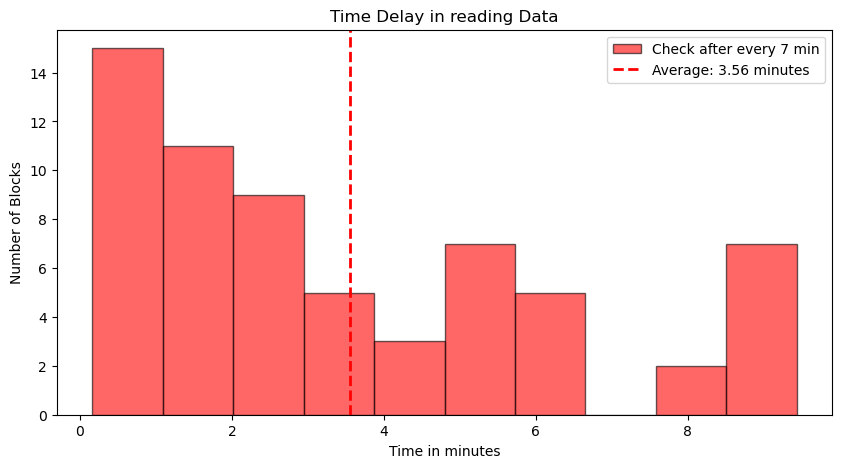

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(df["time_difference"].iloc[1:], color="red", edgecolor="black", alpha=0.6, label="Check after every 7 min")
average_value = df["time_difference"].iloc[1:].mean()
plt.axvline(x=average_value, color="red", linestyle="dashed", linewidth=2, label=f"Average: {average_value:.2f} minutes")
plt.xlabel("Time in minutes")
plt.ylabel("Number of Blocks")
plt.title("Time Delay in reading Data")
plt.legend()
plt.show()

In [9]:
df = pd.read_csv(r"C:\Users\jaske\PycharmProjects\capstone\logs\source_custom_logs.csv")
df["creation_time"] = pd.to_datetime(df["creation_time"])
df["receiver_time"] = pd.to_datetime(df["receiver_time"])
df["time_difference"] = ((df["receiver_time"] - df["creation_time"]).dt.total_seconds() / 60)
df.head()

,block,creation_time,receiver_time,time_difference
0,832697,2024-03-02 00:44:24.164011,2024-03-02 01:09:22.286248,24.968704
1,832698,2024-03-02 01:25:39.456906,2024-03-02 01:26:01.755304,0.371640
2,832699,2024-03-02 01:31:35.935360,2024-03-02 01:31:57.550937,0.360260
3,832700,2024-03-02 01:33:19.289702,2024-03-02 01:35:04.186270,1.748276
4,832701,2024-03-02 01:35:31.765141,2024-03-02 01:38:08.648598,2.614724


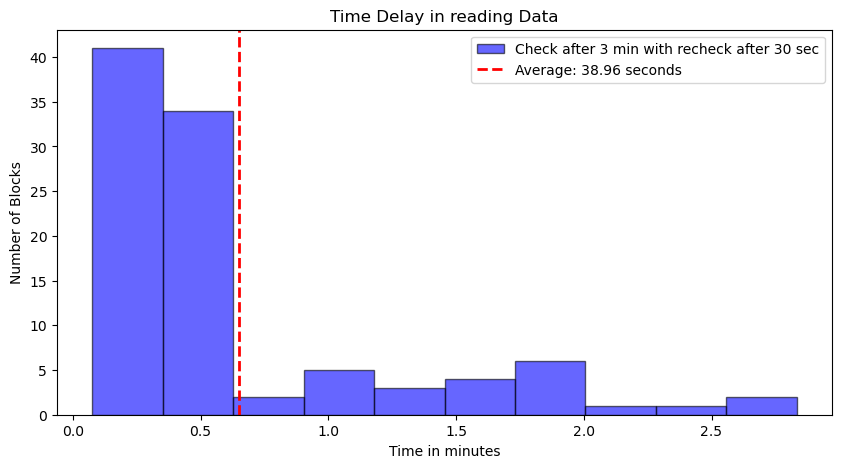

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df["time_difference"].iloc[1:], color="blue", edgecolor="black", alpha=0.6, label="Check after 3 min with recheck after 30 sec")
average_value = df["time_difference"].iloc[1:].mean()
plt.axvline(x=average_value, color="red", linestyle="dashed", linewidth=2, label=f"Average: {average_value*60:.2f} seconds")
plt.xlabel("Time in minutes")
plt.ylabel("Number of Blocks")
plt.title("Time Delay in reading Data")
plt.legend()
plt.show()